# Feature Selection-Information gain - mutual information In Regression Problem Statements

In [1]:
import pandas as pd
housing_df = pd.read_csv('Housing_data.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Lets just remove all the object or categorical columns for now we can encode them but i am lazy

In [4]:
for column in housing_df.columns:
    if housing_df[column].dtype=='object':
        housing_df.drop(labels=[column],axis=1,inplace=True)
        
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [5]:
housing_df.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


In [6]:
# The id is of no use so lets remove that too

In [7]:
housing_df.drop('Id',axis=1,inplace=True)

In [8]:
X = housing_df.drop(labels=['SalePrice'],axis=1)
y = housing_df['SalePrice']

#### Its always a better practice to split the data into train and test part before feature selection in order to avoid the over fitting

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008


In [11]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

## Lets determine the mutual information

In [12]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0),y_train) # Here i am filling all the null values in the train data with 0 just for siplifyinng the process
mutual_info

array([0.2503648 , 0.21639376, 0.16450162, 0.51800441, 0.10079973,
       0.35460409, 0.24595252, 0.10097065, 0.15987301, 0.00291137,
       0.11019951, 0.38555594, 0.31036057, 0.22198459, 0.0014097 ,
       0.4815936 , 0.02697739, 0.00465208, 0.25944488, 0.07352702,
       0.05695973, 0.01160122, 0.17634994, 0.18181153, 0.26852327,
       0.37099792, 0.37216316, 0.07439241, 0.17151823, 0.02190334,
       0.00070458, 0.03028102, 0.        , 0.00078637, 0.        ,
       0.00449276])

In [13]:
# Lets sort this data and make a series so that we will be able to visualize this

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=True)

PoolArea         0.000000
MoSold           0.000000
3SsnPorch        0.000705
MiscVal          0.000786
LowQualFinSF     0.001410
BsmtFinSF2       0.002911
YrSold           0.004493
BsmtHalfBath     0.004652
KitchenAbvGr     0.011601
EnclosedPorch    0.021903
BsmtFullBath     0.026977
ScreenPorch      0.030281
BedroomAbvGr     0.056960
HalfBath         0.073527
WoodDeckSF       0.074392
OverallCond      0.100800
MasVnrArea       0.100971
BsmtUnfSF        0.110200
BsmtFinSF1       0.159873
LotArea          0.164502
OpenPorchSF      0.171518
TotRmsAbvGrd     0.176350
Fireplaces       0.181812
LotFrontage      0.216394
2ndFlrSF         0.221985
YearRemodAdd     0.245953
MSSubClass       0.250365
FullBath         0.259445
GarageYrBlt      0.268523
1stFlrSF         0.310361
YearBuilt        0.354604
GarageCars       0.370998
GarageArea       0.372163
TotalBsmtSF      0.385556
GrLivArea        0.481594
OverallQual      0.518004
dtype: float64

<AxesSubplot:>

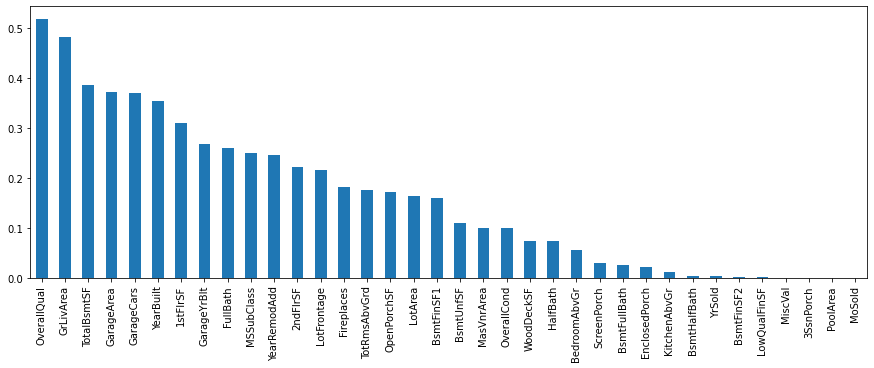

In [15]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(15,5))

In [17]:
# Here we have around 36 features lets just select the 20 percentile of the features

from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression , percentile=20)
Selected_features = selected_top_columns.fit(X_train.fillna(0),y_train)

In [20]:
Selected_features.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [21]:
Selected_features = X_train.columns[Selected_features.get_support()]
Selected_features

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

### So our top 20 percentile of the features are stored in the list Selected_Features
#### Lets remove all of the other columns from both the X_train and X_test data

In [23]:
def column_dropper(data,selected):
    for columns in data.columns:
        if columns not in selected:
            data.drop(labels=[columns],axis=1,inplace=True)
    return data.head(2)

column_dropper(X_train,Selected_features)



,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
64,7,1997,1057,1057,2034,2,645
682,6,1996,1291,1291,1291,2,431


In [24]:
column_dropper(X_test,Selected_features)

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
529,6,1957,2035,2515,2515,2,484
491,6,1941,806,958,1578,1,240


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 64 to 684
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1022 non-null   int64
 1   YearBuilt    1022 non-null   int64
 2   TotalBsmtSF  1022 non-null   int64
 3   1stFlrSF     1022 non-null   int64
 4   GrLivArea    1022 non-null   int64
 5   GarageCars   1022 non-null   int64
 6   GarageArea   1022 non-null   int64
dtypes: int64(7)
memory usage: 63.9 KB


In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 529 to 898
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  438 non-null    int64
 1   YearBuilt    438 non-null    int64
 2   TotalBsmtSF  438 non-null    int64
 3   1stFlrSF     438 non-null    int64
 4   GrLivArea    438 non-null    int64
 5   GarageCars   438 non-null    int64
 6   GarageArea   438 non-null    int64
dtypes: int64(7)
memory usage: 27.4 KB
